# Euler–Maclaurin
# of two dimentional Epstein zeta function

In [1]:
def num_int(f, a, b):
    from scipy import integrate

    try:
        integral = integrate.quad(f, a, b)

        result = integral[0]
        return result

    except Exception as ex:

        print ("Exception ex = ", str(ex))
        print ("f = ", f)
        try:
            #print ("integrand = ", get_integrand_view(f))
            print ("integrand = ", f(x))
        except Exception as ex2:
            print ("Exception ex2 = ", ex2)

        print ("a, b = ", a, ",", b)
        try:
            print ("f(a) = ", f(a))
        except:
            pass
        try:
            print ("f(b) = ", f(b))
        except:
            pass

        import inspect
        stack = inspect.stack()
        for frame in stack:
            func_name = frame[3]
            print ("func_name = ", func_name)
        
        raise ex

In [2]:
logging = False

calc_R_p=True

def my_euler_maclaurin1(f,symb,a,b,p, f_diff_symb_p=None):
    if logging:
        print("f", f)
        print("symb,a,b", symb, a, b)
        print("")


    sum_dfdx_a_bernoullis = sum([(f.diff(symb,k-1))*(bernoulli(k)/factorial(k)) for k in range(1,1+p)])
    if logging:
        print("sum_dfdx_a_bernoullis", sum_dfdx_a_bernoullis)
        print("sum_dfdx_a_bernoullis(a)", sum_dfdx_a_bernoullis.subs(symb == a))
        if Infinity != b:
            print("sum_dfdx_a_bernoullis(b)", sum_dfdx_a_bernoullis.subs(symb == b))

    if True:
        B = lambda x, p : bernoulli_polynomial(x, p)
        P = lambda x, p : bernoulli_polynomial(x - floor(x), p)
        fact = lambda n : factorial(n)
    else:
        B = function("B")(x,p)
        P = function("P")(x,p)
        fact = function("fact")(n)
        
    if True == calc_R_p:
        # Can't calculate derivative wrt j + u.
        #int_R_p = lambda j : integral(f.diff(symb,p).subs(symb == u+j) * bernoulli_polynomial(u,p)/factorial(p), (u,0,1))
        def int_R_p(f,symb,j):
            v = var("v")            
            if None == f_diff_symb_p:
                deriv = f.diff(symb,p)
            else:
                deriv = f_diff_symb_p
            if logging:
                print("deriv", deriv)
            deriv_s = deriv.subs(symb == v+j)
            if logging:
                print("deriv_s", deriv_s)
            int_f_diff_B_fact = integral(deriv_s * bernoulli_polynomial(v,p)/factorial(p), (v,0,1))
            if logging:
                print("int_f_diff_B_fact", int_f_diff_B_fact)
            return int_f_diff_B_fact
        
        def int_R_p_shifted_first(f,symb,j):
            v = var("v")
            fn_shifted = f.subs(symb == v + j)
            if logging:
                print("fn_shifted", fn_shifted)
            deriv = fn_shifted.diff(v,p)
            if logging:
                print("deriv", deriv)
            int_f_diff_B_fact = integral(deriv * B(x=v,p=p)/fact(n=p), (v,0,1))
    
            if logging:
                print("int_f_diff_B_fact", int_f_diff_B_fact)

            return int_f_diff_B_fact

        if logging:
            print("int_R_p(j = a)", int_R_p(f,symb,j = a))
            
        if use_int_R_p_j:
            v, j = var("v, j")
            assume(j>0)
            from sage.calculus.calculus import symbolic_sum
            if change_R_p_order:
                # Change order of summation and integration
                if use_int_R_p_shifted_first:
                    R_p = (-1)^(p+1)*integral(symbolic_sum(f.subs(symb == v+j).diff(v,p)*B(x=v,p=p)/fact(n=p), \
                                                  j, a, b-1), \
                                              (v,0,1), algorithm = "sympy")
                else:
                    if None == f_diff_symb_p:
                        f_diff_symb_p = f.diff(symb,p)
                    R_p = (-1)^(p+1)*integral(symbolic_sum(f_diff_symb_p.subs(symb == v+j)*B(x=v,p=p)/fact(n=p), \
                                                  j, a, b-1), \
                                              (v,0,1), algorithm = "sympy")
            else:
                if use_int_R_p_shifted_first:
                    R_p = (-1)^(p+1)*symbolic_sum(int_R_p_shifted_first(f,symb,j=j), j, a, b-1)
                else:
                    R_p = (-1)^(+1)*symbolic_sum(int_R_p(f,symb,j=j), j, a, b-1)
                
        else:
            if None == f_diff_symb_p:
                f_diff_symb_p = f.diff(symb,p)
            if not use_num_int:
                R_p = (-1)^(p+1)*integral(f_diff_symb_p * P(x=symb,p=p)/fact(n=p),(symb,a,b),hold=True, algorithm = "sympy")
            else:
                R_p = (-1)^(p+1)*num_int(lambda symb : f_diff_symb_p * P(x=symb,p=p)/fact(n=p), a, b)
                

    int_fn_a_b = integral(f, (symb, a, b))
    if logging:
        print("int_fn_a_b", int_fn_a_b)
    
    s = int_fn_a_b - sum_dfdx_a_bernoullis.subs(symb == a)
    if Infinity != b:
        s += sum_dfdx_a_bernoullis.subs(symb == b)
    if True == calc_R_p:
        s += R_p
        
    if False:
        print("int_fn_a_b", int_fn_a_b)
        print("sum_dfdx_a_bernoullis(a)", sum_dfdx_a_bernoullis(a))
        if Infinity != b:
            print("sum_dfdx_a_bernoullis(b)", sum_dfdx_a_bernoullis(b))
        if True == calc_R_p:
            print("int_R_p(j = a)", int_R_p(j = a))
            print("R_p", R_p)
        print("")
        print("s",s)
    return s

$${\displaystyle \sum _{i=a}^{b}f(i)=\int _{a}^{b}f(x)\,dx+{\frac {f(a)+f(b)}{2}}+\sum _{k=1}^{\lfloor p/2\rfloor }{\frac {B_{2k}}{(2k)!}}(f^{(2k-1)}(b)-f^{(2k-1)}(a))+R_{p},}$$

$${\displaystyle \sum _{i=a}^{b}f(i)=\int _{a}^{b}f(x)\,dx+\sum _{k=1}^{\lfloor p/2\rfloor }{\frac {B_{k}}{(k)!}}(f^{(k-1)}(b)-f^{(k-1)}(a))+R_{p},}$$

$${\displaystyle R_{p}=(-1)^{p+1}\sum_{j=a}^{b-1} \int _{0}^{1}f^{(p)}(v+j){\frac {B_{p}(v)}{p!}}\,dv.}$$

$${\displaystyle P_{k}(x)=B_{k}(x-\lfloor x\rfloor ),}$$

$${\displaystyle R_{p}=(-1)^{p+1}\int _{a}^{b}f^{(p)}(x){\frac {P_{p}(x)}{p!}}\,dx.}$$

In [3]:
# https://www.journals.vu.lt/LMJ/article/view/20600/19701
# ФОРМУЛА СУММИРОВАНИЯ ЭЙЛЕРА—МАКЛОРЕНА ДЛЯ ФУНКЦИИ МНОГИХ ПЕРЕМЕННЫХ А.БИКЯЛИС
# VIII LIETUVOS MATEMATIKOS RINKINYS 4
# ЛИТОВСКИЙ МАТЕМАТИЧЕСКИЙ СБОРНИК
# 1968

# Далее,обе стороны этого равенства суммируем по всем целым m2 из интервала(z2,y2). Получаем

if True:
    B = lambda x, p : bernoulli_polynomial(x, p)
    P = lambda x, p : bernoulli_polynomial(x - floor(x), p)
    fact = lambda n : factorial(n)
else:
    B = function("B")(x,p)
    P = function("P")(x,p)
    fact = function("fact")(n)

def integral_R_p(f,symb,jx,hold, f_diff_symb_p=None):
    vx = var("v_"+str(symb))
    if None == f_diff_symb_p:
        deriv = f.diff(symb,p)
    else:
        deriv = f_diff_symb_p
    if logging:
        print("deriv", deriv)

    deriv_subs = deriv.subs(symb == vx+jx)
    if logging:
        print("deriv_subs", deriv_subs)

    integrand = deriv_subs * bernoulli_polynomial(vx,p)/factorial(p)
    if logging:
        print("integrand", integrand)

    intvx_f_diff_B_fact = integral(integrand, vx, hold=hold)
    if logging:
        print("intvx_f_diff_B_fact", intvx_f_diff_B_fact)

    int_f_diff_B_fact = integral(integrand, (vx,0,1), hold=hold, algorithm="sympy")
    if logging:
        print("int_f_diff_B_fact", int_f_diff_B_fact)

    return int_f_diff_B_fact

def integral_R_p_shifted_first(f,symb,jx,hold):
    vx = var("v_"+str(symb))
    fn_shifted = f.subs(symb == vx + jx)
    if logging:
        print("fn_shifted", fn_shifted)

    deriv = fn_shifted.diff(vx,p)
    if logging:
        print("deriv", deriv)

    int_f_diff_B_fact = integral(deriv * B(x=vx,p=p)/fact(n=p), (vx, 0, 1), hold=hold, algorithm="sympy")

    if logging:
        print("int_f_diff_B_fact", int_f_diff_B_fact)

    return int_f_diff_B_fact
    
    
def euler_maclaurin_R_p(f,symb,a,b,p, f_diff_symb_p=None, hold_int=True, hold_sum=True):
    if logging:
        print("f", f)
        print("symb,a,b", symb, a, b)
        if f_diff_symb_p is not None:
            print("f_diff_symb_p", f_diff_symb_p)
        print("")
    if use_int_R_p_j:
        jx = var('j_'+str(symb))
        assume(jx>0)
        from sage.calculus.calculus import symbolic_sum
        
        if change_R_p_order:
            vx = var("v_"+str(symb))
            # Change order of summation and integration
            if use_int_R_p_shifted_first:
                R_p = (-1)^(p+1)*integral(symbolic_sum(f.subs(symb == vx+jx).diff(vx,p)*B(x=vx,p=p)/fact(n=p), \
                                              jx, a, b-1, hold=hold_sum), \
                                          (vx,0,1), hold=hold_int, algorithm = "sympy")
            else:
                if None == f_diff_symb_p:
                    f_diff_symb_p = f.diff(symb,p)
                R_p = (-1)^(p+1)*integral(symbolic_sum(f_diff_symb_p.subs(symb == vx+jx)*B(x=vx,p=p)/fact(n=p), \
                                              jx, a, b-1, hold=hold_sum), \
                                          (vx,0,1), hold=hold_int, algorithm = "sympy")
        else:       
            if use_int_R_p_shifted_first:
                term = (-1)^(p+1)*integral_R_p_shifted_first(f=f, symb=symb, jx=jx, hold=hold_int)
                if logging:
                    print("term", term)
                R_p = symbolic_sum(term, jx, a, b-1, hold=hold_sum)
            else:
                term = (-1)^(p+1)*integral_R_p(f=f, symb=symb, jx=jx, hold=hold_int, f_diff_symb_p=f_diff_symb_p)
                if logging:
                    print("term", term)
                R_p = symbolic_sum(term, jx, a, b-1, hold=hold_sum)
            return R_p, term
    else:
        if not use_num_int:
            if None == f_diff_symb_p:
                f_diff_symb_p = f.diff(symb,p)
            if logging:
                print("(-1)^(p+1)*P(x=symb,p=p)/fact(n=p)", (-1)^(p+1)*P(x=symb,p=p)/fact(n=p))
            R_p = (-1)^(p+1)*integral(f_diff_symb_p * P(x=symb,p=p)/fact(n=p),(symb,a,b),hold=hold_int, algorithm = "sympy")
        else:
            R_p = (-1)^(p+1)*num_int(lambda symb: f_diff_symb_p * P(x=symb,p=p)/fact(n=p), a, b)
            
    return R_p

$$\sum _{k=1}^{\lfloor p/2\rfloor }{\frac {B_{k}}{(k)!}}(f^{(k-1)}(b)-f^{(k-1)}(a))$$

In [4]:
def sum_dfdx_bernoulis(f,symb,a,b,p):
    dfdx_a_bernoullis = []
    for k in range(1,1+p):
        dfdx_a_bernoullis += [(f.diff(symb,k-1))*(bernoulli(k)/factorial(k))]
        
    sum_dfdx_a_bernoullis = sum(dfdx_a_bernoullis)

    if logging:
        print("sum_dfdx_a_bernoullis", sum_dfdx_a_bernoullis)
        print("sum_dfdx_a_bernoullis(a)", sum_dfdx_a_bernoullis.subs(symb == a))
        if Infinity != b:
            print("sum_dfdx_a_bernoullis(b)", sum_dfdx_a_bernoullis.subs(symb == b))

    s = - sum_dfdx_a_bernoullis.subs(symb == a)
    if Infinity != b:
        s += sum_dfdx_a_bernoullis.subs(symb == b)
    return s


In [5]:
def sum_dfdx_bernoulis_str(f,symb,a,b,p):
    sum_dfdx_a_bernoullis = ""
    for k in range(1,1+p):
        if k - 1 > 0:
            sum_dfdx_a_bernoullis += " + (" + str(bernoulli(k)/factorial(k)) + ") * (" + str(f) + ").diff(" + str(symb) + ", " + str(k-1) + ")"
        else:
            sum_dfdx_a_bernoullis += " + (" + str(bernoulli(k)/factorial(k)) + ") * (" + str(f) + ")"
            

    if logging:
        print("sum_dfdx_a_bernoullis", sum_dfdx_a_bernoullis)
        print("sum_dfdx_a_bernoullis(a)", "(" + sum_dfdx_a_bernoullis + ").subs(" + str(symb) + "==" + str(a) + ")")
        if Infinity != b:
            print("sum_dfdx_a_bernoullis(b)", "(" + sum_dfdx_a_bernoullis + ").subs(" + str(symb) + "==" + str(b) + ")")
    s = ""

    s += "- (" + sum_dfdx_a_bernoullis + ").subs(" + str(symb) + "==" + str(a) + ")"
    if Infinity != b:
        s += " + (" + sum_dfdx_a_bernoullis + ").subs(" + str(symb) + "==" + str(b) + ")"
    return s


In [6]:
# sumy_sumx = sum_dfdx_bernoulis(sum_dfdx_bernoulis (F(x,y), x, a_x, b_x,p), y, a_y, b_y, p)
def sum_dfdy_bernoulis_sum_dfdx_bernoulis_str(f, x, a_x, b_x, y, a_y, b_y, p):
    str_f = sum_dfdx_bernoulis_str(f(x=x,y=y), x, a_x, b_x, p)
    sum_dfdx_a_bernoullis = ""
    for k in range(1,1+p):
        if k - 1 > 0:
            sum_dfdx_a_bernoullis += " + (" + str(bernoulli(k)/factorial(k)) + ") * (" + str_f + ").diff(" + str(y) + ", " + str(k-1) + ")"
        else:
            sum_dfdx_a_bernoullis += " + (" + str(bernoulli(k)/factorial(k)) + ") * (" + str_f + ")"

    if logging:
        print("sum_dfdx_a_bernoullis", sum_dfdx_a_bernoullis)
        print("sum_dfdx_a_bernoullis(a)", "(" + sum_dfdx_a_bernoullis + ").subs(" + str(y) + "==" + str(a_y) + ")")
        if Infinity != b:
            print("sum_dfdx_a_bernoullis(b)", "(" + sum_dfdx_a_bernoullis + ").subs(" + str(y) + "==" + str(b_y) + ")")
    s = ""

    s += "- (" + sum_dfdx_a_bernoullis + ").subs(" + str(y) + "==" + str(a_y) + ")"
    if Infinity != b_y:
        s += " + (" + sum_dfdx_a_bernoullis + ").subs(" + str(y) + "==" + str(b_y) + ")"
    return s

In [7]:
def definite_integral_derivative(f, x, a, b, diff_param, hold=True):
    from sage.symbolic.integration.integral import definite_integral

    if not x.has(diff_param):
        # integration variable != differentiation variable
        ans = definite_integral(f.diff(diff_param), x, a, b, hold=hold, algorithm = "sympy")
    else:
        ans = SR.zero()

    if hasattr(b, 'diff'):
        if b.diff(diff_param) != 0:
            ans += f.subs(x == b) * b.diff(diff_param)
    if hasattr(a, 'diff'):
        if a.diff(diff_param) != 0:
            ans -= f.subs(x == a) * a.diff(diff_param)

    return ans


In [8]:
def definite_integral_derivative_str(f, x, a, b, diff_param=None, hold=False, algorithm=None):

    if not x.has(diff_param):
        # integration variable != differentiation variable
        if algorithm is not None:
            ans = "integrate((" + str(f) + ").diff(" + str(diff_param) + "), " + str(x) + ", " + str(a) + ", " + str(b) + ", algorithm = "\""+ algorithm + ", hold = " + str(hold) + ")"
        else:
            ans = "definite_integral((" + str(f) + ").diff(" + str(diff_param) + "), " + str(x) + ", " + str(a) + ", " + str(b) + ", hold = " + str(hold) + ")"
    else:
        ans = ""

    if hasattr(b, 'diff'):
        if b.diff(diff_param) != 0:
            ans += " + " + str(f.subs(x == b) * b.diff(diff_param))
    if hasattr(a, 'diff'):
        if a.diff(diff_param) != 0:
            ans += " - " + str(f.subs(x == a) * a.diff(diff_param))

    return ans

In [9]:
def definite_num_int_derivative_str(f, x, a, b, diff_param=None):

    if not x.has(diff_param):
        # integration variable != differentiation variable
        ans = "num_int(lambda " + str(x)+ " : " + str(f.diff(diff_param)) + ", " + str(a) + ", " + str(b) + ")"
    else:
        ans = ""

    if hasattr(b, 'diff'):
        if b.diff(diff_param) != 0:
            ans += " + " + str(f.subs(x == b) * b.diff(diff_param))
    if hasattr(a, 'diff'):
        if a.diff(diff_param) != 0:
            ans += " - " + str(f.subs(x == a) * a.diff(diff_param))

    return ans

$$\sum _{k=1}^{\lfloor p/2\rfloor }{\frac {B_{k}}{(k)!}}(g(y)^{(k-1)}(b_y)-g(y)^{(k-1)}(a_y))$$
where 

$$g(y) = {\displaystyle R_{p}(y)=(-1)^{p+1}\sum_{j=a_x}^{b_x-1} \int _{0}^{1}\frac{\partial^{p}}{\partial x^{p}}f(v_x+j,y){\frac {B_{p}(v_x)}{p!}}\,dv_x.}$$
or

$${\displaystyle P_{k}(x)=B_{k}(x-\lfloor x\rfloor ),}$$

$$g(y) = {\displaystyle R_{p}=(-1)^{p+1}\int _{a_x}^{b_x}\frac{\partial^{p}}{\partial x^{p}}f(x,y){\frac {P_{p}(x)}{p!}}\,dx.}$$

In [10]:
#int_R_p = integral(euler_maclaurin_R_p(f(x,y), x, a_x, b_x,p), (y, a_y, b_y), hold=True)

def integral_euler_maclaurin_R_p(f, x, a_x, b_x, y, a_y, b_y, p, f_diff_x_p, hold_int=True, hold_sum=True):
    if logging:
        print("f", f)
        print("f(x,y)", f(x=x,y=y))
        if None != f_diff_x_p:
            print("f_diff_x_p", f_diff_x_p)
            print("f_diff_x_p(x,y)", f_diff_x_p(x=x,y=y))
        print("")
    if use_int_R_p_j:
        jx = var('j_x')
        assume(jx>0)
        from sage.calculus.calculus import symbolic_sum
        
        if change_R_p_order:
            vx = var("v_"+str(x))
            # Change order of summation and integration
            if use_int_R_p_shifted_first:
                int_R_p = (-1)^(p+1)*integral(integral(symbolic_sum(f.subs(x == vx+jx).diff(vx,p)*B(x=vx,p=p)/fact(n=p), \
                                              jx, a_x, b_x-1, hold=hold_sum), \
                                          (vx,0,1), hold=hold_int, algorithm = "sympy"), y, a_y, b_y, hold=hold_int, algorithm = "sympy")
            else:
                if None == f_diff_x_p:
                    f_diff_x_p = f.diff(x,p)
                int_R_p = (-1)^(p+1)*integral(integral(symbolic_sum(f_diff_x_p.subs(x == vx+jx)*B(x=vx,p=p)/fact(n=p), \
                                              jx, a_x, b_x-1, hold=hold_sum), \
                                          (vx,0,1), hold=hold_int, algorithm = "sympy"), y, a_y, b_y, hold=hold_int, algorithm = "sympy")
        else:       
            if use_int_R_p_shifted_first:
                int_int = (-1)^(p+1)*integral(integral_R_p_shifted_first(f=f, symb=x, jx=jx, hold=hold_int), y, a_y, b_y, hold=hold_int, algorithm = "sympy")
                int_R_p = symbolic_sum(int_int, jx, a_x, b_x-1, hold=hold_sum)
            else:
                int_int = (-1)^(p+1)*integral(integral_R_p(f=f, symb=x, jx=jx, hold=hold_int), y, a_y, b_y, hold=hold_int, algorithm = "sympy")
                int_R_p = symbolic_sum(int_int, jx, a_x, b_x-1, hold=hold_sum)
            return (int_R_p, int_int)
    else:
        if not use_num_int:
            if None == f_diff_x_p:
                f_diff_x_p = f.diff(x,p)
            int_R_p = (-1)^(p+1)*integral(integral(f_diff_x_p * P(x=x,p=p)/fact(n=p),(x,a_x,b_x),hold=hold_int, algorithm = "sympy"), y, a_y, b_y, hold=hold_int, algorithm = "sympy")
        else:
            int_R_p = (-1)^(p+1)*num_int(lambda y : num_int(lambda x : f_diff_x_p(x=x,y=y) * P(x=x,p=p)/fact(n=p), a_x, b_x), a_y, b_y)
            
    return int_R_p

In [11]:
#sum_R_p = sum_dfdx_bernoulis(euler_maclaurin_R_p(F(x,y), x, a_x, b_x,p), y, a_y, b_y, p)
def sum_dfdx_bernoulis_euler_maclaurin_R_p(f, x, a_x, b_x, y, a_y, b_y, p):
    if logging:
        print("sum_dfdx_bernoulis_euler_maclaurin_R_p", f, x, a_x, b_x, y, a_y, b_y, p)
    dfdx_a_bernoullis = []
    dfdx_a_bernoullis_terms = []
    from sage.calculus.calculus import symbolic_sum
    from sage.symbolic.integration.integral import definite_integral
    
    for k in range(1,1+p):
        if 1 == k:
            if use_int_R_p_j:
                vx, jx = var("v_x, j_x")
                term_1 = lambda y_symb, y_val, p, jx : (-1)^(p+1)*definite_integral(f(x=x,y=y_symb).diff(x,p) \
                                                                                 .subs(x == vx + jx) \
                                                                      * B(x=vx,p=p)/fact(n=p),vx,0,1,hold=False) \
                                                                                .subs(y_symb == y_val)
                if logging:
                    print("k", k)
                    print("term_1(y_symb=y, y_val=a_y,jx=a_x) =", term_1(y_symb=y, y_val=a_y,jx=a_x))
                    
                R_p_1 = lambda y_symb, y_val, p : symbolic_sum(expression=term_1(y_symb=y_symb, y_val=y_val, p=p, jx=jx), \
                                                                     v=jx, a=a_x, b=b_x-1)
                dfdx_a_bernoullis_terms += [lambda y_symb, y_val, p, jx, i=k-1 : \
                                            term_1(y_symb=y_symb, y_val=y_val, jx=jx)*(bernoulli(i+1)/factorial(i+1))]
            else:
                R_p_1 = lambda y_symb, y_val, p : (-1)^(p+1)*definite_integral(f(x=x,y=y_symb).diff(x,p) * P(x=x,p=p)/fact(n=p), \
                                                                  x, a_x, b_x, hold=True) \
                                                                  .subs(y_symb == y_val)
                if logging:
                    print("k", k)
                    print("R_p_1(y_symb=y, y_val=a_y) =", R_p_1(y, y, p))
                    print("R_p_1(y_symb=y, y_val=a_y) =", R_p_1(y_symb=y, y_val=a_y, p=p))
                
            if logging:
                print("R_p(y_symb=y, y_val=a_y) =", R_p_1(y_symb=y, y_val=a_y, p=p))
                print("\n")

            dfdx_a_bernoullis += [lambda y_symb, y_val, p, i=k-1 : R_p_1(y_symb=y_symb, y_val=y_val, p=p)*(bernoulli(i+1)/factorial(i+1))]
            if logging:
                print("dfdx_a_bernoullis =", dfdx_a_bernoullis)
                print("len(dfdx_a_bernoullis) =", len(dfdx_a_bernoullis))

                for ii in range(len(dfdx_a_bernoullis)):
                    print("dfdx_a_bernoullis [",ii, "]()=", dfdx_a_bernoullis[ii])
                    print("dfdx_a_bernoullis [",ii, "]()=", dfdx_a_bernoullis[ii](y, y, p))
                    print("dfdx_a_bernoullis [",ii, "](a_y)=", dfdx_a_bernoullis[ii](y, a_y, p))
                    print("dfdx_a_bernoullis [",ii, "](a_y)=", dfdx_a_bernoullis[ii](y_symb=y, y_val=a_y, p=p))

        elif 2 == k:
            if use_int_R_p_j:
                vx, jx = var("v_x, j_x")
                term_2 = lambda y_symb, y_val, p, jx : (-1)^(p+1)*definite_integral_derivative(f=f(x=x,y=y_symb).diff(x,p) \
                                                                                 .subs(x == vx + jx) \
                                        * B(x=vx,p=p)/fact(n=p), x=vx, a=0, b=1, diff_param=y_symb, hold=False) \
                                                                                .subs(y_symb == y_val)

                if logging:
                    print("k", k)
                    print("term_2(y_symb=y, y_val=a_y,jx=a_x) =", term_2(y_symb=y, y_val=a_y, p=p, jx=a_x))

                R_p_2 = lambda y_symb, y_val, p : symbolic_sum(expression=term_2(y_symb=y_symb, y_val=y_val, p=p, jx=jx), \
                                                                 v=jx, a=a_x, b=b_x-1)
                dfdx_a_bernoullis_terms += [lambda y_symb, y_val, p, jx, i=k-1 : \
                                            term_2(y_symb=y_symb, y_val=y_val, p=p, jx=jx)*(bernoulli(i+1)/factorial(i+1))]
            else:
                R_p_2 = lambda y_symb, y_val, p : (-1)^(p+1)*definite_integral_derivative(f=f(x=x,y=y_symb).diff(x,p) \
                                            * P(x=x,p=p)/fact(n=p), x=x, a=a_x, b=b_x, diff_param=y_symb) \
                                                  .subs(y_symb == y_val)

                if logging:
                    print("k", k)
                    print("R_p_2(y_symb=y, y_val=a_y) =", R_p_2(y, y, p))
                    print("R_p_2(y_symb=y, y_val=a_y) =", R_p_2(y_symb=y, y_val=a_y, p=p))
                
            if logging:
                print("R_p(y_symb=y, y_val=a_y) =", R_p_2(y_symb=y, y_val=a_y, p=p))
                print("\n")
        
            dfdx_a_bernoullis += [lambda y_symb, y_val, p, i=k-1 : R_p_2(y_symb=y_symb, y_val=y_val, p=p)*(bernoulli(i+1)/factorial(i+1))]
            if logging:
                print("dfdx_a_bernoullis =", dfdx_a_bernoullis)
                print("len(dfdx_a_bernoullis) =", len(dfdx_a_bernoullis))

                for ii in range(len(dfdx_a_bernoullis)):
                    print("dfdx_a_bernoullis [",ii, "]()=", dfdx_a_bernoullis[ii])
                    print("dfdx_a_bernoullis [",ii, "]()=", dfdx_a_bernoullis[ii](y, y, p))
                    print("dfdx_a_bernoullis [",ii, "](a_y)=", dfdx_a_bernoullis[ii](y, a_y, p))
                    print("dfdx_a_bernoullis [",ii, "](a_y)=", dfdx_a_bernoullis[ii](y_symb=y, y_val=a_y, p=p))
        else:
            if use_int_R_p_j:
                vx, jx = var("v_x, j_x")
                term_3 = lambda y_symb, y_val, p, jx : (-1)^(p+1)*definite_integral_derivative(f=f(x=x,y=y_symb).diff(x,p) \
                                                                                 .subs(x == vx + jx) \
                                        * B(x=vx,p=p)/fact(n=p), x=vx, a=0, b=1, diff_param=y_symb, hold=False) \
                                            .diff(y_symb, k-2) .subs(y_symb == y_val)

                if logging:
                    print("k", k)
                    print("term_3(y_symb=y, y_val=a_y,jx=a_x) =", term_3(y_symb=y, y_val=a_y, p=p, jx=a_x))
                    
                R_p_3 = lambda y_symb, y_val, p : symbolic_sum(expression=term_3(y_symb=y_symb, y_val=y_val, p=p, jx=jx), \
                                                                 v=jx, a=a_x, b=b_x-1)
                dfdx_a_bernoullis_terms += [lambda y_symb, y_val, p, jx, i=k-1 : \
                                            term_3(y_symb=y_symb, y_val=y_val, p=p, jx=jx)*(bernoulli(i+1)/factorial(i+1))]
            else:
                R_p_3 = lambda y_symb, y_val, p : (-1)^(p+1)*definite_integral_derivative(f=f(x=x,y=y_symb).diff(x,p) \
                                                    * P(x=x,p=p)/fact(n=p), x=x, a=a_x, b=b_x, diff_param=y_symb) \
                                                    .diff(y_symb, k-2).subs(y_symb == y_val)
                
            if logging:
                print("R_p(y_symb=y, y_val=a_y) =", R_p_3(y_symb=y, y_val=a_y, p=p))
                print("\n")

            dfdx_a_bernoullis += [lambda y_symb, y_val, p, i=k-1 : R_p_3(y_symb=y_symb, y_val=y_val, p=p)*(bernoulli(i+1)/factorial(i+1))]
            if logging:
                print("dfdx_a_bernoullis =", dfdx_a_bernoullis)
                print("len(dfdx_a_bernoullis) =", len(dfdx_a_bernoullis))

                for ii in range(len(dfdx_a_bernoullis)):
                    print("dfdx_a_bernoullis [",ii, "]()=", dfdx_a_bernoullis[ii])
                    print("dfdx_a_bernoullis [",ii, "]()=", dfdx_a_bernoullis[ii](y, y, p))
                    print("dfdx_a_bernoullis [",ii, "](a_y)=", dfdx_a_bernoullis[ii](y, a_y, p))
                    print("dfdx_a_bernoullis [",ii, "](a_y)=", dfdx_a_bernoullis[ii](y_symb=y, y_val=a_y, p=p))

    if logging:
        print("dfdx_a_bernoullis =", dfdx_a_bernoullis)
        print("len(dfdx_a_bernoullis) =", len(dfdx_a_bernoullis))
        
        for ii in range(len(dfdx_a_bernoullis)):
            print("dfdx_a_bernoullis [",ii, "]()=", dfdx_a_bernoullis[ii])
            print("dfdx_a_bernoullis [",ii, "]()=", dfdx_a_bernoullis[ii](y, y, p))
            print("dfdx_a_bernoullis [",ii, "](a_y)=", dfdx_a_bernoullis[ii](y, a_y, p))
            print("dfdx_a_bernoullis [",ii, "](a_y)=", dfdx_a_bernoullis[ii](y_symb=y, y_val=a_y, p=p))



    sum_dfdx_a_bernoullis = lambda y_symb, y_val, p : sum([dfdx_a_bernoullis[i](y_symb, y_val, p) \
                                                      for i in range(len(dfdx_a_bernoullis))])
    
    sum_dfdx_a_bernoullis_terms = lambda y_symb, y_val, p, jx : sum([dfdx_a_bernoullis_terms[i](y_symb, y_val, p, jx) \
                                                               for i in range(len(dfdx_a_bernoullis_terms))])
    
    if logging:
        print("sum_dfdx_a_bernoullis =", sum_dfdx_a_bernoullis)
        print("sum_dfdx_a_bernoullis(a_y) =", sum_dfdx_a_bernoullis(y_symb=y, y_val=a_y, p=p))
    
    s = - sum_dfdx_a_bernoullis(y_symb=y, y_val=a_y, p=p)
    if b_y is Infinity:
        s_terms = lambda jx : - sum_dfdx_a_bernoullis_terms(y_symb=y, y_val=a_y, p=p, jx=jx)
    else:
        s += sum_dfdx_a_bernoullis(y_symb=y, y_val=b_y, p=p)
        s_terms = lambda jx : sum_dfdx_a_bernoullis_terms(y_symb=y, y_val=b_y, p=p, jx=jx) - sum_dfdx_a_bernoullis_terms(y_symb=y, y_val=a_y, p=p, jx=jx)
    return s, s_terms

$${\displaystyle R_{p}=(-1)^{p+1}\sum_{j=a_y}^{b_y-1} \int _{0}^{1}g^{(p)}(v_y+j){\frac {B_{p}(v_y)}{p!}}\,dv_y.}$$

$${\displaystyle P_{k}(y)=B_{k}(y-\lfloor y\rfloor ),}$$

$${\displaystyle R_{p}=(-1)^{p+1}\int _{a_y}^{b_y}g^{(p)}(y){\frac {P_{p}(y)}{p!}}\,dy.}$$

where

$$g(y) = {\displaystyle R_{p}(y)=(-1)^{p+1}\sum_{j=a_x}^{b_x-1} \int _{0}^{1}\frac{\partial^{p}}{\partial x^{p}}f(v_x+j,y){\frac {B_{p}(v_x)}{p!}}\,dv_x.}$$
or

$${\displaystyle P_{k}(x)=B_{k}(x-\lfloor x\rfloor ),}$$

$$g(y) = {\displaystyle R_{p}=(-1)^{p+1}\int _{a_x}^{b_x}\frac{\partial^{p}}{\partial x^{p}}f(x,y){\frac {P_{p}(x)}{p!}}\,dx.}$$

In [12]:
#R_p_R_p = euler_maclaurin_R_p(euler_maclaurin_R_p(F(x,y), x, a_x, b_x,p), y, a_y, b_y, p)
def euler_maclaurin_R_p_euler_maclaurin_R_p(f, x, a_x, b_x, y, a_y, b_y, p, f_diff_x_p_diff_y_p):

    from sage.calculus.calculus import symbolic_sum
    from sage.symbolic.integration.integral import definite_integral
    if use_int_R_p_j:
        vx,vy = var("v_x, v_y")
        jx,jy = var("j_x, j_y")
        assume(v_y+j_y>0)
        
        if None == f_diff_x_p_diff_y_p:
            f_diff_x_p_diff_y_p = f.diff(x,p).diff(y,p)

        R_p_R_p = (-1)^(p+1)*symbolic_sum(definite_integral( \
                               (-1)^(p+1)*symbolic_sum(definite_integral(f_diff_x_p_diff_y_p.subs(x == vx + jx)  \
                                                              * B(x=vx,p=p)/fact(n=p), \
                                 vx,0,1,hold=True, algorithm = "sympy"), v=jx, a=a_x, b=b_x-1,hold=True) \
                                                                        .diff(y,p).subs(y == vy + jy)  \
                                                              * B(x=vy,p=p)/fact(n=p), \
                                 vy,0,1,hold=True, algorithm = "sympy"), v=jy, a=a_y, b=b_y-1,hold=True)
    else:
        if not use_num_int:

            if None == f_diff_x_p_diff_y_p:
                f_diff_x_p_diff_y_p = f.diff(x,p)

            R_p_R_p = (-1)^(p+1)*definite_integral( \
                               (-1)^(p+1)*definite_integral(f_diff_x_p_diff_y_p  \
                                                              * P(x=x,p=p)/fact(n=p), \
                                 x, a_x, b_x, hold=True, algorithm = "sympy").diff(y,p)  \
                                                              * P(x=y,p=p)/fact(n=p), \
                                 y, a_y, b_y, hold=True, algorithm = "sympy")
        else:
            f_diff_x_p_diff_y_p_num_str = "f_diff_x_diff_y_num = lambda " + str(x) + ", " + str(y) + ":" + str(f(x,y).diff(x,p).diff(y,p))
            print("f_diff_x_p_diff_y_p_num_str=", f_diff_x_p_diff_y_p_num_str)                                                                          
            exec(preparse(f_diff_x_p_diff_y_p_num_str))
            R_p_R_p = (-1)^(p+1)*num_int(lambda y : \
                               (-1)^(p+1)*num_int(lambda x : f_diff_x_p_diff_y_p_num(x,y)  \
                                                              * P(x=x,p=p)/fact(n=p), \
                                 a_x, b_x)  \
                                                              * P(x=y,p=p)/fact(n=p), \
                                 a_y, b_y)
        
    return R_p_R_p

In [13]:
#R_p_R_p = euler_maclaurin_R_p(euler_maclaurin_R_p(F(x,y), x, a_x, b_x,p), y, a_y, b_y, p)
def euler_maclaurin_R_p_euler_maclaurin_R_p_num_int(f_diff_x_p_diff_y_p, x, a_x, b_x, y, a_y, b_y, p):
    R_p_R_p = (-1)^(p+1)*num_int(lambda y : \
                       (-1)^(p+1)*num_int(lambda x : f_diff_x_p_diff_y_p(x,y)  \
                                                      * P(x=x,p=p)/fact(n=p), \
                         a_x, b_x)  \
                                                      * P(x=y,p=p)/fact(n=p), \
                         a_y, b_y)
    return R_p_R_p

In [14]:
def euler_maclaurin1(f, symb, a, b, p, f_diff_symb_p=None, hold_int=True, hold_sum=True):
    if logging:
        print("f", f)
        print("symb,a,b", symb, a, b)
        print("")
    #u, j = var("u, j")

    int_fn_a_b = integral(f, (symb, a, b))
    if logging:
        print("int_fn_a_b", int_fn_a_b)
    
    #s = int_fn_a_b + sum_dfdx_a_bernoullis(b) - sum_dfdx_a_bernoullis(a) + R_p
    s = int_fn_a_b + sum_dfdx_bernoulis(f,symb,a,b,p)
    
    if True == calc_R_p:
        R_p = euler_maclaurin_R_p(f, symb, a, b, p, f_diff_symb_p=f_diff_symb_p,hold_int=hold_int, hold_sum=hold_sum)
        if type(R_p) is tuple:
            s += R_p[0]
        else:
            s += R_p

    return s

In [15]:
from IPython.display import display, Math, Latex

In [16]:
a_x = var("a_x")
b_x = var("b_x")
a_y = var("a_y")
b_y = var("b_y")

assume(a_x, 'real')
assume(b_x, 'real')
assume(a_y, 'real')
assume(b_y, 'real')

assume(a_x, 'integer')
assume(b_x, 'integer')
assume(a_y, 'integer')
assume(b_y, 'integer')

assume(a_x > 0)
assume(b_x > 0)
assume(a_y > 0)
assume(b_y > 0)

assume(b_x-a_x>0)
assume(b_y-a_y>0)


x,y = var("x,y")

n = QQ['n'].0
j = QQ['j'].0

p = 4
p = 3
p = 2
p = 1

S = var("S")
assume(S > 0)
F = (x^2 + y^2)^(-S)
print(F)

1/((x^2 + y^2)^S)


$${\displaystyle R_{p}=(-1)^{p+1}\sum_{j=a}^{b-1} \int _{0}^{1}f^{(p)}(u+j){\frac {B_{p}(u)}{p!}}\,du.}$$

In [17]:
use_int_R_p_j=True
change_R_p_order=False
use_int_R_p_shifted_first=False
use_num_int = False
logging = True

In [18]:
intx = integral(F,x, algorithm="sympy")
print("intx=", intx)
print("intx=$", latex(intx),"$")
display(Math(latex(intx)))

intxab = integral(F,(x, a_x, b_x), algorithm="sympy")
print("intxab=", intxab)
print("intxab=$", latex(intxab),"$")
display(Math(latex(intxab)))

int_int = integral(intx, (y, a_y, b_y), algorithm="sympy")
print("int_int=", int_int)
#print("int_int=$", latex(int_int),"$")
display(Math(latex(int_int)))

intx= x*hypergeometric((1/2, S), (3/2,), -x^2/y^2)/y^(2*S)
intx=$ \frac{x \,_2F_1\left(\begin{matrix} \frac{1}{2},S \\ \frac{3}{2} \end{matrix} ; -\frac{x^{2}}{y^{2}} \right)}{y^{2 \, S}} $


<IPython.core.display.Math object>

intxab= -a_x*hypergeometric((1/2, S), (3/2,), -a_x^2/y^2)/y^(2*S) + b_x*hypergeometric((1/2, S), (3/2,), -b_x^2/y^2)/y^(2*S)
intxab=$ -\frac{a_{x} \,_2F_1\left(\begin{matrix} \frac{1}{2},S \\ \frac{3}{2} \end{matrix} ; -\frac{a_{x}^{2}}{y^{2}} \right)}{y^{2 \, S}} + \frac{b_{x} \,_2F_1\left(\begin{matrix} \frac{1}{2},S \\ \frac{3}{2} \end{matrix} ; -\frac{b_{x}^{2}}{y^{2}} \right)}{y^{2 \, S}} $


<IPython.core.display.Math object>

int_int= x*integrate(hypergeometric((1/2, S), (3/2,), -x^2/y^2)/y^(2*S), y, a_y, b_y)


<IPython.core.display.Math object>

In [19]:
sumx = sum_dfdx_bernoulis (F, x, a_x, b_x,p)
print("sumx=", sumx)
display(Math(latex(sumx)))

inty_sumx = integral(sumx, y, algorithm="sympy")
print("inty_sumx=", inty_sumx)
print("inty_sumx=$", latex(inty_sumx),"$")
display(Math(latex(inty_sumx)))

inty_sumx_a_x1(y, S) = inty_sumx.subs(a_x == 1)
print("inty_sumx_a_x1=", inty_sumx_a_x1(y, S))
print("inty_sumx_a_x1=$", latex(inty_sumx_a_x1(y, S)),"$")
display(Math(latex(inty_sumx_a_x1(y, S))))

int_sum = integral(sumx, (y, a_y, b_y), algorithm="sympy")
print("int_sum=", int_sum)
#print("int_sum=$", latex(int_sum),"$")
display(Math(latex(int_sum)))

lim_inty_sumx = limit(inty_sumx_a_x1, y = Infinity)
print("lim_inty_sumx=", lim_inty_sumx)
#print("lim_inty_sumx=$", latex(lim_inty_sumx),"$")
display(Math(latex(lim_inty_sumx)))


sum_dfdx_a_bernoullis -1/2/(x^2 + y^2)^S
sum_dfdx_a_bernoullis(a) -1/2/(a_x^2 + y^2)^S
sumx= 1/2/(a_x^2 + y^2)^S


<IPython.core.display.Math object>

inty_sumx= 1/2*y*hypergeometric((1/2, S), (3/2,), -y^2/a_x^2)/a_x^(2*S)
inty_sumx=$ \frac{y \,_2F_1\left(\begin{matrix} \frac{1}{2},S \\ \frac{3}{2} \end{matrix} ; -\frac{y^{2}}{a_{x}^{2}} \right)}{2 \, a_{x}^{2 \, S}} $


<IPython.core.display.Math object>

inty_sumx_a_x1= 1/2*y*hypergeometric((1/2, S), (3/2,), -y^2)
inty_sumx_a_x1=$ \frac{1}{2} \, y \,_2F_1\left(\begin{matrix} \frac{1}{2},S \\ \frac{3}{2} \end{matrix} ; -y^{2} \right) $


<IPython.core.display.Math object>

int_sum= -1/2*a_y*hypergeometric((1/2, S), (3/2,), -a_y^2/a_x^2)/a_x^(2*S) + 1/2*b_y*hypergeometric((1/2, S), (3/2,), -b_y^2/a_x^2)/a_x^(2*S)


<IPython.core.display.Math object>

lim_inty_sumx= (y, S) |--> 1/2*limit(y*hypergeometric((1/2, S), (3/2,), -y^2), y, +Infinity)


<IPython.core.display.Math object>

/usr3/articles/sagemath_docker_build/sage/local/lib/python3.9/site-packages/sage/plot/plot.py:3957: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  data[i] = (float(xi), float(f(xi)))
/usr3/articles/sagemath_docker_build/sage/local/lib/python3.9/site-packages/sage/plot/plot.py:3808: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  y = float(f(x))


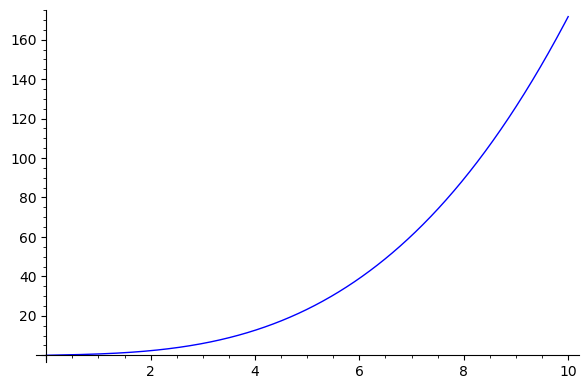

In [20]:
plot(inty_sumx_a_x1(y, S=-1),(y,0,10))

/usr3/articles/sagemath_docker_build/sage/local/lib/python3.9/site-packages/sage/plot/plot.py:3957: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  data[i] = (float(xi), float(f(xi)))
/usr3/articles/sagemath_docker_build/sage/local/lib/python3.9/site-packages/sage/plot/plot.py:3808: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  y = float(f(x))


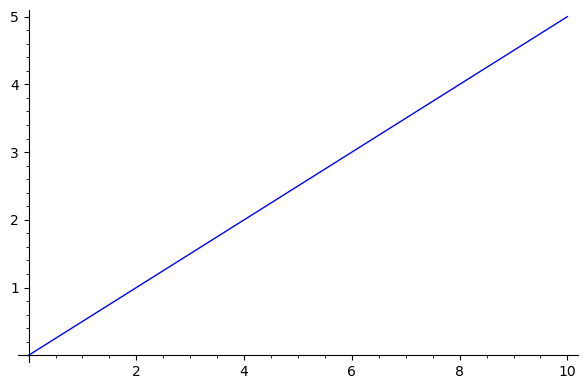

In [21]:
plot(inty_sumx_a_x1(y, S=0),(y,0,10))

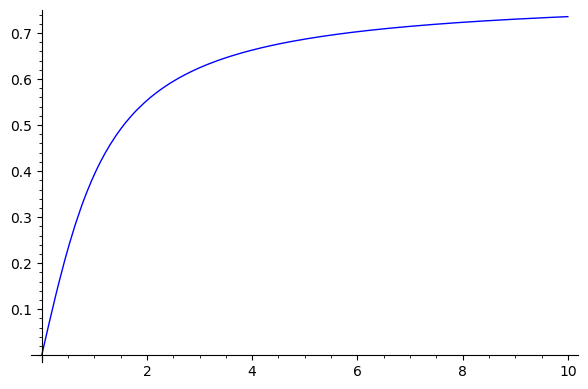

In [22]:
plot(inty_sumx_a_x1(y, S=1),(y,0,10))

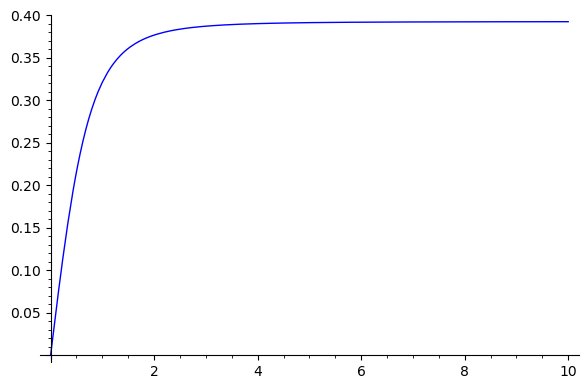

In [23]:
plot(inty_sumx_a_x1(y, S=2),(y,0,10))

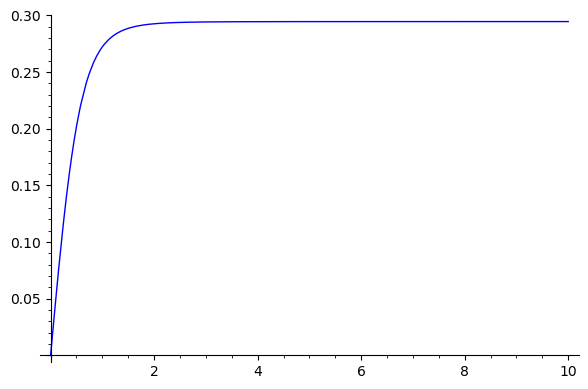

In [24]:
plot(inty_sumx_a_x1(y, S=3),(y,0,10))

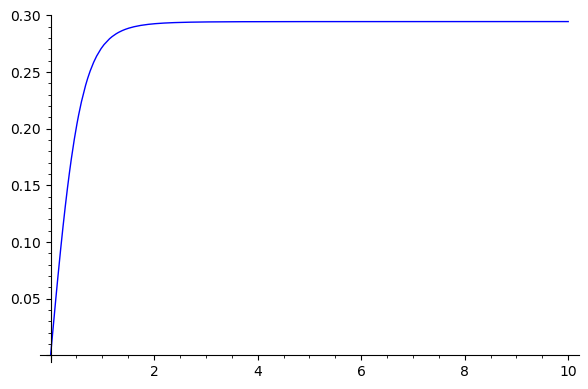

In [25]:
plot(inty_sumx_a_x1(y, S=3),(y,0,10))

In [26]:
sumx_str = sum_dfdx_bernoulis_str (F, x, a_x, b_x, p)
inty_sumx_str = "integral(" + sumx_str + ", (y, a_y, b_y), algorithm=\"sympy\")"
print("inty_sumx_str=", inty_sumx_str)
exec(preparse("inty_sumx=" + inty_sumx_str))
print(preparse("inty_sumx=" + inty_sumx_str))
#print("inty_sumx = $", latex(inty_sumx),"$")
display(Math("inty(sumx) = " + latex(inty_sumx)))

sum_dfdx_a_bernoullis  + (-1/2) * (1/((x^2 + y^2)^S))
sum_dfdx_a_bernoullis(a) ( + (-1/2) * (1/((x^2 + y^2)^S))).subs(x==a_x)
inty_sumx_str= integral(- ( + (-1/2) * (1/((x^2 + y^2)^S))).subs(x==a_x), (y, a_y, b_y), algorithm="sympy")
inty_sumx=integral(- ( + (-Integer(1)/Integer(2)) * (Integer(1)/((x**Integer(2) + y**Integer(2))**S))).subs(x==a_x), (y, a_y, b_y), algorithm="sympy")


<IPython.core.display.Math object>

In [27]:
sum_int = sum_dfdx_bernoulis(integral(F,(x, a_x, b_x), algorithm="sympy"),  y, a_y, b_y, p)
print("sum_int=",sum_int)
#print("sum_int=$",latex(sum_int),"$")
display(Math(latex(sum_int)))

sum_dfdx_a_bernoullis 1/2*a_x*hypergeometric((1/2, S), (3/2,), -a_x^2/y^2)/y^(2*S) - 1/2*b_x*hypergeometric((1/2, S), (3/2,), -b_x^2/y^2)/y^(2*S)
sum_dfdx_a_bernoullis(a) 1/2*a_x*hypergeometric((1/2, S), (3/2,), -a_x^2/a_y^2)/a_y^(2*S) - 1/2*b_x*hypergeometric((1/2, S), (3/2,), -b_x^2/a_y^2)/a_y^(2*S)
sum_int= -1/2*a_x*hypergeometric((1/2, S), (3/2,), -a_x^2/a_y^2)/a_y^(2*S) + 1/2*b_x*hypergeometric((1/2, S), (3/2,), -b_x^2/a_y^2)/a_y^(2*S)


<IPython.core.display.Math object>

In [28]:
sum_sum = sum_dfdx_bernoulis(sum_dfdx_bernoulis (F, x, a_x, b_x,p), y, a_y, b_y, p)
print("sum_sum=",sum_sum)
#print("sum_sum=$",latex(sum_sum),"$")
display(Math(latex(sum_sum)))

sum_dfdx_a_bernoullis -1/2/(x^2 + y^2)^S
sum_dfdx_a_bernoullis(a) -1/2/(a_x^2 + y^2)^S
sum_dfdx_a_bernoullis -1/4/(a_x^2 + y^2)^S
sum_dfdx_a_bernoullis(a) -1/4/(a_x^2 + a_y^2)^S
sum_sum= 1/4/(a_x^2 + a_y^2)^S


<IPython.core.display.Math object>

In [29]:
display(Math(latex(int_sum)))

<IPython.core.display.Math object>

In [30]:
display(Math(latex(sum_int)))

<IPython.core.display.Math object>

In [31]:
display(Math(latex(sum_sum)))

<IPython.core.display.Math object>

# Summary Euler–Maclaurin 2D for ${\displaystyle \sum\limits_{m,n=1}^{\infty} \, \left(m^{2} + n^{2}\right)^{-2} }$

Numerical Euler–Maclaurin 2D for $\sum\limits_{m,n=1}^{\infty} \, \left(m^{2} + n^{2}\right)^{-2}$

$${\displaystyle \sum \limits_{m,n=1}^{\infty} \, \left(m^{2} + n^{2}\right)^{-S} }$$

In [32]:
def zeta_2D_1_1(S, N):
    
    def zeta_2D_row(S, first, N):
        #print("N", N, [m for m in range(0,N)])
        row_sum = 0
        for m in range(first, N):
            row_sum += (N^2+m^2)^(-S)
            #print("m", m, "row_sum=", row_sum)
        return row_sum

    def zeta_2D_diag(S, N):
        diag_elem = (2*N^2)^(-S)
        #print("N", N, "diag_elem=", diag_elem)
        return diag_elem
    
    zeta_2D_sum = 0
    for n in range(1,N):
        zeta_2D_add = 2 * zeta_2D_row(S, 1, n) + zeta_2D_diag(S, n)
        zeta_2D_sum += zeta_2D_add
        
        #print(n, zeta_2D_add, zeta_2D_sum)
    return zeta_2D_sum

In [33]:
zeta_2D_1_1(2, 1000)

0.4243791332035987

R_p=False (Euler–Maclaurin 2D without remainer part)

# Two Dimensional Linear Zeta Function

https://core.ac.uk/download/pdf/82162715.pdf

JOURNAL OF NUMBER THEORY 35, 62-71 (1990)

Evaluation of Multidimensional Linear Zeta Functions

ALFRED ACTOR*

Department of Physics, The Pennsylvania State University,

Fogelsville, Pennsylvania 18051

Communicated by Hans Zassenhaus

Received January 28, 1988; revised May 5, 1989

A prototypical formula of this type is [1] 

$\sum \limits_{m,n=-\infty}^{\infty} \, \left(m^{2} + n^{2}\right)^{-S} = 4 \, \zeta \left(S\right) \, \beta \left(S\right)$

where the prime means that $n = m = 0$ is excluded from the sum. 

where of course, $\zeta\left(S\right)$ is the Riemann $\zeta$-function [2]

while $\beta\left(S\right) = \sum \limits_{n=0}^{\infty}\left( - \right)^n \left(2n + 1\right)^{-S}$
defines, for $Re S > 0$, a function whose properties throughout the s-plane are
well known [3].

Thus Eq. (1) fully reveals the properties of the twodimensional Epstein $\zeta$-function [4] on the left. 



1. G. H. HARDY, Notes on some points in the integral calculus LII, Mess. Math. 49 (1919),
85-91.
2. H. M. EDWARDS, “Riemann’s Zeta Function,” Academic Press, New York, 1974.
3. A. ERDELYI, W. MAGNUS, F. OEERHETTINGER, AND F. G. TRICOMI (Eds.), “Higher Transcendental Functions,” Vol. 1, McGraw-Hill, New York, 1953. 
LINEAR ZETA FUNCTIONS 71
4. P. EPSTEIN, Zur Theorie allgemeiner Zetafunctionen, Marh. Ann. 56 (1903), 615-645; Zur
Theorie allgemeiner Zetafunctionen, II, Math. Ann. 63 (19071, 205-216. 

$${\displaystyle \sum\limits_{m,n=(0)1}^{\infty} \, \left(m^{2} + n^{2}\right)^{-S} = \zeta\left(S\right)\,\beta\left(S\right) }$$

$${\displaystyle \sum\limits_{m,n=(0)1}^{\infty} \, \left(\sqrt{m^{2} + n^{2}}\right)^{-S} = \sum\limits_{m,n=(0)1}^{\infty} \, \left(m^{2} + n^{2}\right)^{-\frac{S}{2}} = \zeta\left(\frac{S}{2}\right)\,\beta\left(\frac{S}{2}\right) }$$

In [34]:
def zeta_2D(S, N):
    
    def zeta_2D_row(S, first, N):
        #print("N", N, [m for m in range(0,N)])
        row_sum = 0
        for m in range(first, N):
            row_sum += (N^2+m^2)^(-S)
            #print("m", m, "row_sum=", row_sum)
        return row_sum

    def zeta_2D_diag(S, N):
        diag_elem = (2*N^2)^(-S)
        #print("N", N, "diag_elem=", diag_elem)
        return diag_elem
    
    zeta_2D_sum = 0
    for n in range(1,N):
        zeta_2D_add = zeta_2D_row(S, 0, n) + zeta_2D_row(S, 1, n) + zeta_2D_diag(S, n)
        zeta_2D_sum += zeta_2D_add
        
        #print(n, zeta_2D_add, zeta_2D_sum)
    return zeta_2D_sum

$${\displaystyle \beta\left(S\right) = \sum\limits_{n=0}^{\infty}\left( - \right)^n \left(2n + 1\right)^{-S} }$$

$${\displaystyle \beta\left(S\right) = \sum\limits_{n=0}^{\infty}\left( - \right)^{2n} \left(2\cdot2n + 1\right)^{-S} +\left( - \right)^{(2n+1)} \left(2(2n+1) + 1\right)^{-S} }$$

$${\displaystyle \beta\left(S\right) = \sum\limits_{n=0}^{\infty}\left( - \right)^{2n} \left(4n + 1\right)^{-S} +\left( - \right)^{(2n+1)} \left(4n+3\right)^{-S} }$$

$${\displaystyle \beta\left(S\right) = \sum\limits_{n=0}^{\infty} \left(4n + 1\right)^{-S} - \left(4n+3\right)^{-S} }$$

$${\displaystyle \beta\left(S\right) = \sum\limits_{n=0}^{\infty} \left(4n + 1\right)^{-S} - \sum\limits_{n=0}^{\infty}\left(4n+3\right)^{-S} }$$

$${\displaystyle \beta\left(S\right) = 4^{-S}\sum\limits_{n=0}^{\infty} \left(n + \frac{1}{4}\right)^{-S} - 4^{-S}\sum\limits_{n=0}^{\infty}\left(n+\frac{3}{4}\right)^{-S} }$$

In [35]:
from sage.calculus.calculus import symbolic_sum
n = var("n")
S = var("S")
beta1_sym = lambda S : symbolic_sum((-1)^n * (2*n + 1)^(-S), n, 0, Infinity)
beta1 = lambda S : sum((-1)^n * (2*n + 1)^(-S), n, 0, Infinity)

def beta1_dig(S,N):
    Sum = 0
    for n in range (N):
        Sum += (-1)^n * (2*n + 1)^(-S)
    return Sum

In [36]:
def beta2_dig(S,N):
    Sum = 0
    for n in range (N/2):
        Sum += (-1)^(2*n)   * (2*(2*n)   + 1)^(-S)
        Sum += (-1)^(2*n+1) * (2*(2*n+1) + 1)^(-S)
    return Sum

$${\displaystyle \beta\left(S\right) = \sum\limits_{n=0}^{\infty} \left(4n + 1\right)^{-S} - \sum\limits_{n=0}^{\infty}\left(4n+3\right)^{-S} }$$

In [37]:
def beta2_dig_1(S,N):
    Sum = 0
    for n in range (N/2):
        Sum += (-1)^(2*n)   * (2*(2*n)   + 1)^(-S)
    return Sum

In [38]:
def beta2_dig_2(S,N):
    Sum = 0
    for n in range (N/2):
        Sum += (-1)^(2*n+1) * (2*(2*n+1) + 1)^(-S)
    return Sum

In [39]:
(beta2_dig_1(2,100000)/zeta(2)).n()

0.653419394620402

In [40]:
(beta2_dig_2(2,100000)/zeta(2)).n()

-0.0965790855618431

In [41]:
def beta3_dig(S,N):
    Sum = 0
    for n in range (N/2):
        Sum += (4*n + 1)^(-S) - (4*n+3)^(-S)
    return Sum

In [42]:
def beta4_dig(S,N):
    Sum = 0
    for n in range (N/2):
        Sum += (n + 1/4)^(-S) - (n+3/4)^(-S)
    return Sum*4^(-S)

$${\displaystyle \sum\limits_{m,n=0,1}^{\infty} \, \left(m^{2} + n^{2}\right)^{-S}=\sum\limits_{m,n=1}^{\infty} \, \left(m^{2} + n^{2}\right)^{-S}+\zeta(2 S) }$$

$${\displaystyle \sum\limits_{m,n=0,1}^{\infty} \, \left(m^{2} + n^{2}\right)^{-2}=\sum\limits_{m,n=1}^{\infty} \, \left(m^{2} + n^{2}\right)^{-2}+\zeta(4) }$$

$${\displaystyle \frac{1}{4}\sum \limits_{m,n=-\infty}^{\infty} \left(m^{2} + n^{2}\right)^{-S} = \zeta \left(S\right)\beta\left(S\right) }$$

In [43]:
beta1_dig(2,1000)*zeta(2).n()

1.50670280430638

In [44]:
beta2_dig(2,1000)*zeta(2).n()

1.50670280430638

In [45]:
beta3_dig(2,1000)*zeta(2).n()

1.50670280430638

In [46]:
beta3_dig(2,1000)*zeta(2).n()

1.50670280430638

In [47]:
beta4_dig(2,1000)*zeta(2).n()

1.50670280430638

In [48]:
zeta_2D(2, 1000)

1.5067023665809038